In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import re
import matplotlib.pyplot as plt
import nltk
import spacy

In [5]:
from nltk.sentiment import SentimentIntensityAnalyzer

In [9]:
data=pd.read_csv("data/vax_reddit.csv")

#getting rid of http: address in test
data['text'] = data['text'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])

In [43]:
#nltk
sia = SentimentIntensityAnalyzer()



print(data['text'][5])
sia.polarity_scores(data['text'][5])['pos']

The correct takeaway is that the vaccines aren't working. The efficacy is lower than the massaged data from the pharma companies and variants are being created by them and are evading them.

Unfortunately, what we'll be told is that it's because not enough people have been vaccinated so we need to step up the speed and breadth of the process. Also, don't fear, because improved versions are coming that will handle the variants - lather, rinse, repeat.

Reality is the vaccines only keep the hospitalization rates down, temporarily, and may slow spread by keeping coughing and sneezing at bay. No immunity is conferred and ability to infect still exists. With vaccine-induced variants, the pandemic will be extended instead of contained. But who cares - pharma is making money and business can reopen... isn't that what this is all about? (cause it sure isn't about health)


0.079

In [48]:
tmp =data
tmp['pos']=data['text'].apply(lambda x:sia.polarity_scores(x)['pos'])
tmp['neg']=data['text'].apply(lambda x:sia.polarity_scores(x)['neg'])
tmp['neu']=data['text'].apply(lambda x:sia.polarity_scores(x)['neu'])


In [53]:
#texhbl
from textblob import TextBlob
TextBlob(data['text'][5]).sentiment

tmp['polarity']=data['text'].apply(lambda x:TextBlob(x).sentiment.polarity)
tmp['subjectivity']=data['text'].apply(lambda x:TextBlob(x).sentiment.subjectivity)


In [55]:
tmp.describe()

,pos,neg,neu,polarity,subjectivity
count,7079.000000,7079.000000,7079.000000,7079.000000,7079.000000
mean,0.109170,0.098702,0.781963,0.039488,0.368323
std,0.164281,0.142483,0.215163,0.266665,0.311046
min,0.000000,0.000000,0.000000,-1.000000,0.000000
25%,0.000000,0.000000,0.685000,0.000000,0.000000
50%,0.049000,0.033000,0.811000,0.000000,0.400000
75%,0.158000,0.155000,1.000000,0.150000,0.600000
max,1.000000,1.000000,1.000000,1.000000,1.000000


/usr/local/lib/python3.9/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([[<AxesSubplot:title={'center':'pos'}>,
        <AxesSubplot:title={'center':'neg'}>],
       [<AxesSubplot:title={'center':'neu'}>,
        <AxesSubplot:title={'center':'polarity'}>],
       [<AxesSubplot:title={'center':'subjectivity'}>, <AxesSubplot:>]],
      dtype=object)

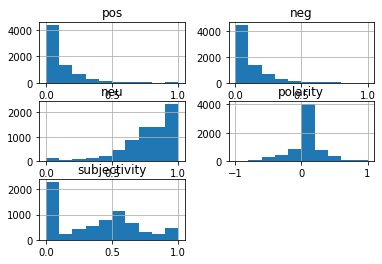

In [56]:
tmp.hist()

In [70]:
#get rid of polarity ==0 and subjectivity==0

tmp2=tmp[(tmp["polarity"]!=0) | (tmp["subjectivity"]!=0)]

In [72]:
tmp2.describe()

,pos,neg,neu,polarity,subjectivity
count,4860.000000,4860.000000,4860.000000,4860.000000,4860.000000
mean,0.131901,0.118813,0.749293,0.057517,0.536494
std,0.162969,0.137258,0.182764,0.320231,0.225149
min,0.000000,0.000000,0.000000,-1.000000,0.000000
25%,0.000000,0.000000,0.666000,-0.100000,0.395833
50%,0.093000,0.090000,0.773000,0.062500,0.512500
75%,0.182000,0.179000,0.867000,0.233333,0.666667
max,1.000000,1.000000,1.000000,1.000000,1.000000


array([[<AxesSubplot:title={'center':'pos'}>,
        <AxesSubplot:title={'center':'neg'}>],
       [<AxesSubplot:title={'center':'neu'}>,
        <AxesSubplot:title={'center':'polarity'}>],
       [<AxesSubplot:title={'center':'subjectivity'}>, <AxesSubplot:>]],
      dtype=object)

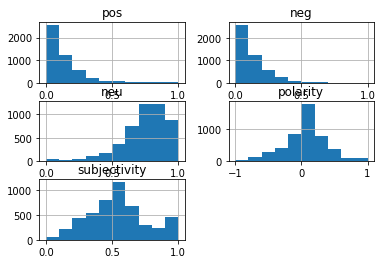

In [74]:
tmp2.hist()